In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [265]:
gold_data=pd.read_csv('gld_price_data.csv' )

In [266]:
gold_data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [267]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [268]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [269]:
print(gold_data['Date'].value_counts())
# Get the unique values of 'B' column
gold_data.Date.unique()

1/2/2008      1
12/15/2014    1
12/5/2014     1
12/8/2014     1
12/9/2014     1
             ..
6/14/2011     1
6/13/2011     1
6/9/2011      1
6/8/2011      1
5/16/2018     1
Name: Date, Length: 2290, dtype: int64


array(['1/2/2008', '1/3/2008', '1/4/2008', ..., '5/10/2018', '5/14/2018',
       '5/16/2018'], dtype=object)

In [270]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'], dayfirst=False)
gold_data['year']= gold_data['Date'].dt.year
gold_data['month']= (gold_data['Date'].dt.year-2008)*12+gold_data['Date'].dt.month

In [271]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,year,month
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,2008,1
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,2008,1
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492,2008,1
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299,2008,1
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099,2008,1


In [272]:
#Checking the number of rows and columns
#boston_house.shape
gold_data.shape

(2290, 8)

In [273]:
# Check for missing values
#boston_house.isnull().sum()
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
year       0
month      0
dtype: int64

In [274]:
#stat measures of dataset
#boston_house.describe()
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD,year,month
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653,2012.724891,63.027948
std,519.111540,23.283346,19.523517,7.092566,0.131547,2.993271,35.844064
min,676.530029,70.000000,7.960000,8.850000,1.039047,2008.000000,1.000000
25%,1239.874969,109.725000,14.380000,15.570000,1.171313,2010.000000,32.000000
50%,1551.434998,120.580002,33.869999,17.268500,1.303297,2013.000000,63.000000
75%,2073.010070,132.840004,37.827501,22.882500,1.369971,2015.000000,94.000000
max,2872.870117,184.589996,117.480003,47.259998,1.598798,2018.000000,125.000000


# Understanding the correlation between the various features in the dataset

1. Positive Correlation
2. Negative Correlation

In [275]:
#correlation= boston_house.corr()
correlation= gold_data.corr()


<ipython-input-275-4fb7fc602724>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation= gold_data.corr()


<Axes: >

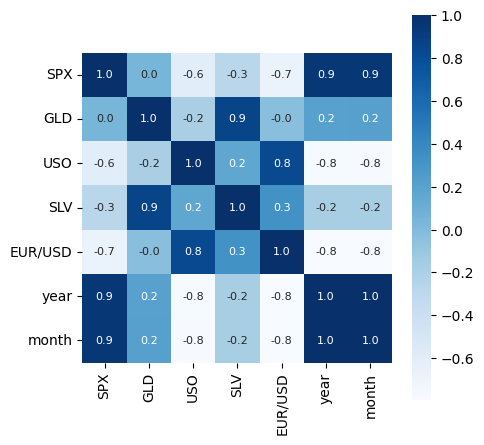

In [276]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, square=  True , fmt='.1f', annot=True, annot_kws={'size':8} ,cmap='Blues' )

In [277]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
year       0.206654
month      0.209140
Name: GLD, dtype: float64


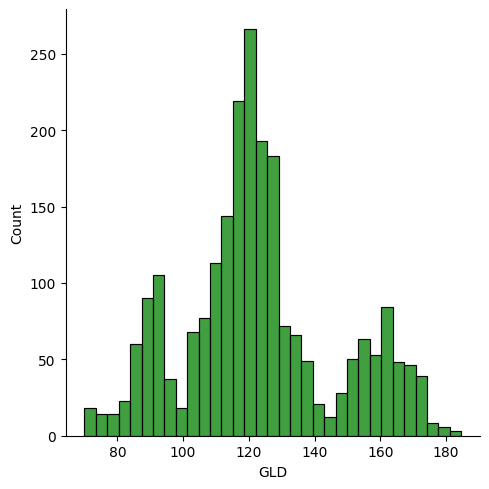

In [278]:
sns.displot(gold_data['GLD'],color='green')

# Splitting the data (features) and Target (label)

In [279]:
#X= boston_house.drop(['Price'],axis=1)
#Y=boston_house['Price']
X= gold_data.drop(['GLD','Date'],axis=1)
Y= gold_data['GLD']

# Splitting the data in Train and Test Data

In [280]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(2290, 6) (1832, 6) (458, 6)


# Model Training

XGBoost Regressor (Decision Tree Ensemble Model)


In [281]:
#loading the model
model= RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

# Evaluation


Prediction on Training Data and Test Data

In [282]:
# Accuracy on prediction on train data
train_data_pred= model.predict(X_train)
# Accuracy on prediction on test data
test_data_pred= model.predict(X_test)

In [283]:
#print(train_data_pred)

In [284]:
# R-squared error
train_score_1 = metrics.r2_score(Y_train,train_data_pred)
# Mean absolute error
train_score_2 = metrics.mean_absolute_error(Y_train,train_data_pred)
# R-squared error
test_score_1 = metrics.r2_score(Y_test,test_data_pred)
# Mean absolute error
test_score_2 = metrics.mean_absolute_error(Y_test,test_data_pred)

In [285]:
print(train_score_1,train_score_2,test_score_1,test_score_2)

print("The r2 score accuracy on Train Data is {}%".format(round(train_score_1, 2) *100))
print("The r2 score accuracy on Test Data is {}%".format(round(test_score_1, 2) *100))
score1 = train_score_2
score2 = test_score_2
print("The Mean Absolute Error on Train Data is {}".format(round(score1, 2)))
print("The Mean Absolute Error on Test Data is {}".format(round(score2, 2)))

score1 = np.sqrt(train_score_2)
score2 = np.sqrt(test_score_2)
print("The Root Mean Squared Error on Train Data is {}".format(round(score1, 2)))
print("The Root Mean Squared Error on Test Data is {}".format(round(score2, 2)))

0.9995606903618242 0.33716511340065314 0.9959545715059054 0.9636496334716145
The r2 score accuracy on Train Data is 100.0%
The r2 score accuracy on Test Data is 100.0%
The Mean Absolute Error on Train Data is 0.34
The Mean Absolute Error on Test Data is 0.96
The Root Mean Squared Error on Train Data is 0.58
The Root Mean Squared Error on Test Data is 0.98


# Visualizing the actual and Predicted Prices

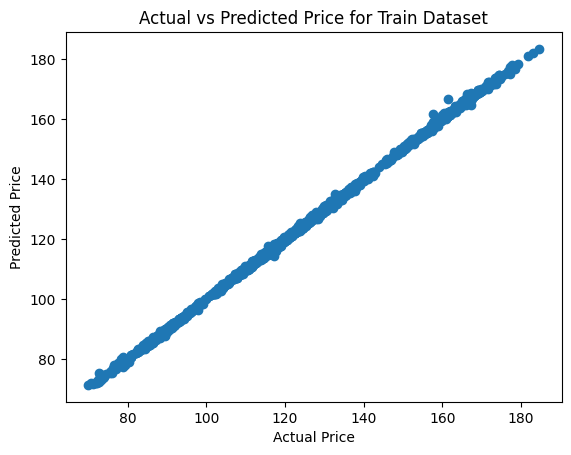

In [286]:
plt.scatter(Y_train, train_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price for Train Dataset")
plt.show()

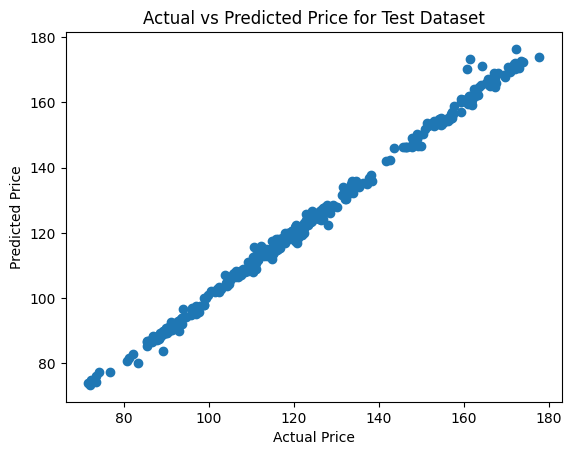

In [287]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price for Test Dataset")
plt.show()